In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/parthkhurana/Desktop/Projects/Protein_classification/pdb_data_no_dups.csv")
df.head(10)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
6,103D,DNA,SOLUTION NMR,DNA,24,NaN,7502.93,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
9,104D,DNA-RNA HYBRID,SOLUTION NMR,DNA/RNA Hybrid,24,NaN,7454.78,NaN,NaN,NaN,NaN,NaN,NaN,1995.0


In [3]:
df_1 = pd.read_csv("/Users/parthkhurana/Desktop/Projects/Protein_classification/pdb_data_seq.csv")
df_1.head(10)

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
5,102D,A,CGCAAATTTGCG,24,DNA
6,102D,B,CGCAAATTTGCG,24,DNA
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
9,103D,A,GTGGAATGGAAC,24,DNA


In [4]:
df_2 = df.set_index('structureId').merge(df_1.set_index('structureId'),on='structureId',how='left')
df_2.head(10)

,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
structureId,,,,,,,,,,,,,,,,,
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20.0,DNA/RNA Hybrid
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20.0,DNA/RNA Hybrid
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24.0,DNA
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24.0,DNA
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154.0,Protein
102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,A,CGCAAATTTGCG,24.0,DNA
102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,B,CGCAAATTTGCG,24.0,DNA
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165.0,Protein
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154.0,Protein


In [5]:
print(df_2.describe())

       residueCount_x     resolution  structureMolecularWeight  \
count   471811.000000  449845.000000              4.718110e+05   
mean      6249.411993       3.020053              9.249303e+05   
std      23602.912835       3.090108              3.016951e+06   
min          0.000000       0.480000              3.143800e+02   
25%        456.000000       2.000000              5.261474e+04   
50%       1140.000000       2.500000              1.308344e+05   
75%       4518.000000       3.100000              6.331348e+05   
max     313236.000000      70.000000              9.773054e+07   

       crystallizationTempK  densityMatthews  densityPercentSol  \
count         317806.000000    390156.000000      390278.000000   
mean             290.882456         2.850614          54.196381   
std                8.903673         0.824283          10.269266   
min                4.000000         0.000000           0.000000   
25%              291.000000         2.320000          46.890000   
50%

In [6]:
print(df_2.shape)

(471811, 17)


In [7]:
df_2.isnull().sum().sort_values(ascending=False)

crystallizationMethod       156948
crystallizationTempK        154005
phValue                     130910
pdbxDetails                  86147
densityMatthews              81655
densityPercentSol            81533
publicationYear              57780
macromoleculeType_y          36432
macromoleculeType_x          36432
resolution                   21966
sequence                       690
chainId                        672
residueCount_y                 662
classification                   4
experimentalTechnique            0
structureMolecularWeight         0
residueCount_x                   0
dtype: int64

In [8]:
df_3 = df_2.drop(['publicationYear', 'chainId','macromoleculeType_x', 'macromoleculeType_y', 'pdbxDetails'], axis = 1)
df_3.shape

(471811, 12)

In [9]:
df_new=df_3.dropna(how='any')
print(df_new.isnull().sum())

classification              0
experimentalTechnique       0
residueCount_x              0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
phValue                     0
sequence                    0
residueCount_y              0
dtype: int64


In [10]:
df_new.shape

(264309, 12)

In [19]:
df_new['classification'].value_counts()

classification
HYDROLASE                                  29596
TRANSFERASE                                24260
RIBOSOME                                   23858
OXIDOREDUCTASE                             22295
IMMUNE SYSTEM                              10876
                                           ...  
Isomerase, PROTEIN BINDING/INHIBITOR           1
RIBOSOME, RNA BINDING PROTEIN                  1
SUGAR BINDING PROTEIN,SIGNALING PROTEIN        1
VIRAL PROTEIN, SUGAR BINDING PROTEIN           1
lipid transport/activator                      1
Name: count, Length: 2762, dtype: int64

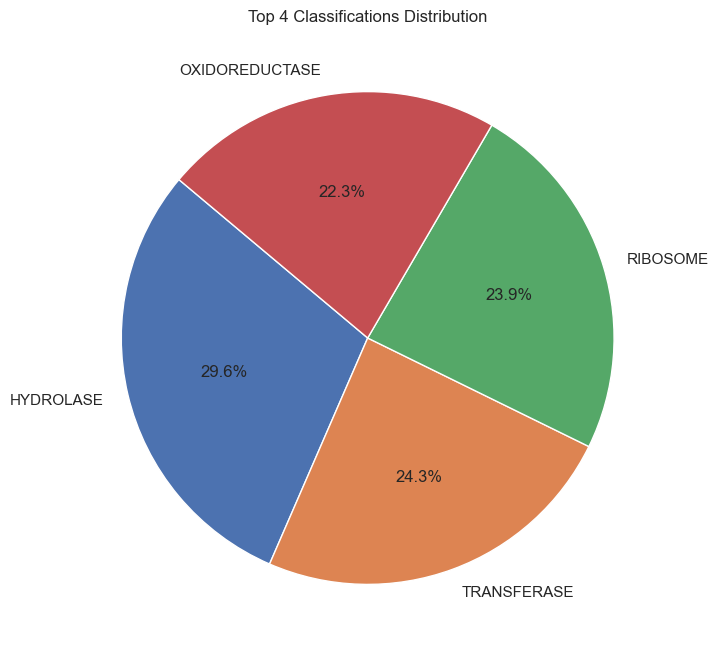

In [20]:
top_values = df_new['classification'].value_counts().index[:4]
classification_counts = df_new['classification'].value_counts().head(4)
sns.set_theme(style="whitegrid")

# Plotting the pie chart using Seaborn
plt.figure(figsize=(8, 8))
sns.color_palette("pastel")
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Classifications Distribution')
plt.show()

In [21]:
# Create a new DataFrame with only the rows where 'classification' is in the top 4 values
df_final = df_new[df_new['classification'].isin(top_values)]

In [22]:
df_final.head()

,classification,experimentalTechnique,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence,residueCount_y
structureId,,,,,,,,,,,,
1A72,OXIDOREDUCTASE,X-RAY DIFFRACTION,374,2.6,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,8.40,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,374.0
1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,402,1.9,45428.53,microseeding,277.0,2.05,32.00,6.10,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0
1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,402,1.9,45428.53,microseeding,277.0,2.05,32.00,6.10,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0
1AR5,OXIDOREDUCTASE,X-RAY DIFFRACTION,402,1.6,45430.34,microseeding,277.0,2.04,32.20,6.15,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0
1AR5,OXIDOREDUCTASE,X-RAY DIFFRACTION,402,1.6,45430.34,microseeding,277.0,2.04,32.20,6.15,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0


In [23]:
df_final['classification'].value_counts()

classification
HYDROLASE         29596
TRANSFERASE       24260
RIBOSOME          23858
OXIDOREDUCTASE    22295
Name: count, dtype: int64

In [24]:
df_final.dtypes

classification               object
experimentalTechnique        object
residueCount_x                int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
phValue                     float64
sequence                     object
residueCount_y              float64
dtype: object

In [25]:
from sklearn.preprocessing import OrdinalEncoder
cat_transformer = OrdinalEncoder()
cat_features = ['crystallizationMethod', 'experimentalTechnique','sequence', 'classification']
transformed_cat = cat_transformer.fit_transform(df_final[cat_features])
df_final[cat_features] = transformed_cat
df_final.head(10)

/var/folders/pp/z15j_rhn22z16k937sk24y340000gn/T/ipykernel_8981/237693225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[cat_features] = transformed_cat


,classification,experimentalTechnique,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence,residueCount_y
structureId,,,,,,,,,,,,
1A72,1.0,4.0,374,2.60,40658.50,119.0,277.0,2.30,46.82,8.40,19603.0,374.0
1AR4,1.0,4.0,402,1.90,45428.53,191.0,277.0,2.05,32.00,6.10,1616.0,402.0
1AR4,1.0,4.0,402,1.90,45428.53,191.0,277.0,2.05,32.00,6.10,1616.0,402.0
1AR5,1.0,4.0,402,1.60,45430.34,191.0,277.0,2.04,32.20,6.15,1616.0,402.0
1AR5,1.0,4.0,402,1.60,45430.34,191.0,277.0,2.04,32.20,6.15,1616.0,402.0
1AUE,3.0,4.0,200,2.33,24203.73,119.0,277.0,2.25,45.00,8.00,2175.0,200.0
1AUE,3.0,4.0,200,2.33,24203.73,119.0,277.0,2.25,45.00,8.00,2175.0,200.0
1AUK,0.0,4.0,489,2.10,52423.45,119.0,291.0,3.30,63.00,5.40,17981.0,489.0
1AVM,1.0,4.0,402,1.55,45514.38,222.0,277.0,2.06,31.70,6.15,1616.0,402.0


array([[<Axes: title={'center': 'classification'}>,
        <Axes: title={'center': 'experimentalTechnique'}>,
        <Axes: title={'center': 'residueCount_x'}>],
       [<Axes: title={'center': 'resolution'}>,
        <Axes: title={'center': 'structureMolecularWeight'}>,
        <Axes: title={'center': 'crystallizationMethod'}>],
       [<Axes: title={'center': 'crystallizationTempK'}>,
        <Axes: title={'center': 'densityMatthews'}>,
        <Axes: title={'center': 'densityPercentSol'}>],
       [<Axes: title={'center': 'phValue'}>,
        <Axes: title={'center': 'sequence'}>,
        <Axes: title={'center': 'residueCount_y'}>]], dtype=object)

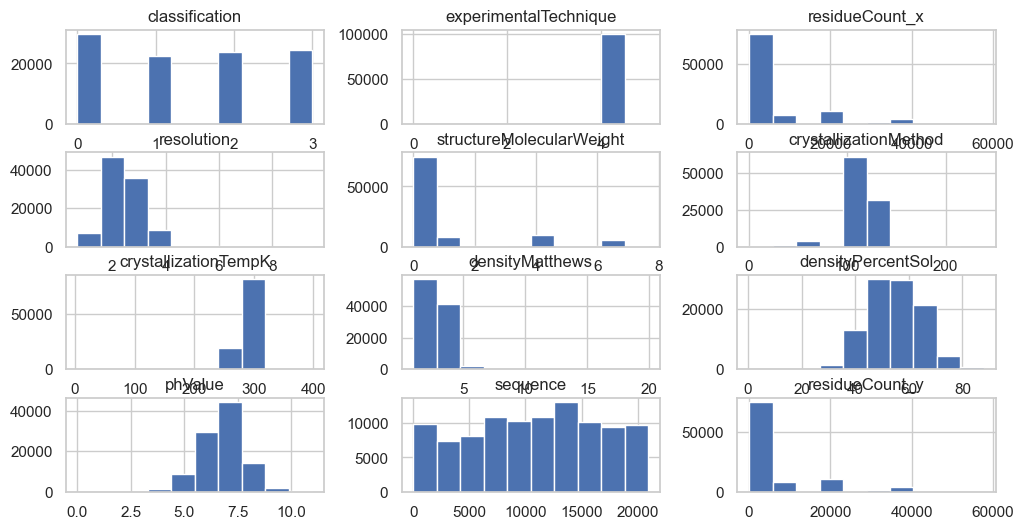

In [48]:
df_final.hist(figsize=(12,6), layout=(4,3))